In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
def f(x: np.float64) -> np.float64:
    return x*np.sin(2 - x)

In [3]:
def equal_partition(a: np.float64, b: np.float64, n: int) -> np.ndarray:
    return np.linspace(a, b, n)

def Chebyschev_partition(a: np.float64, b: np.float64, n: int) -> np.ndarray:
    n -= 2
    get_x = lambda k: 0.5*(a + b) + 0.5*(b - a) * np.cos(np.pi * (2*k + 1)/(2*n + 2))
    x = [get_x(k) for k in range(n, -1, -1)]
    partition = np.array([a] + x + [b])
    return partition

In [4]:
Polynom = namedtuple("Polynom", ["a", "b", "c", "x0", "x1"])
def make_spline(x: np.ndarray, y: np.ndarray, dfa: np.float64):
    spline = []
    n = len(x) - 1
    a, b, c = [0]*n, [0]*n, [0]*n
    for i in range(n):
        a[i] = y[i]
        b[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        #print("B", i, b[i])
    c[0] = (dfa - b[0])/(2*x[1])
    #print("C", 0, c[0])
    for i in range(1, n):
        c[i] = (b[i] - b[i-1])/(2 * x[i+1]) + x[i-1]/x[i+1] * c[i-1]
        #print("C", i, c[i])
    for i in range(n):
        spline.append(Polynom(a[i], b[i], c[i], x[i], x[i+1]))
    #print(c)
    return spline

In [5]:
def PrintSpline(spline: list):
    for P in spline:
        print(P.a, P.b, P.c, P.x0, P.x1)

In [45]:
a, b = 1, 4
x = equal_partition(a, b, 15)
#x = Chebyschev_partition(a, b, 50)
y = np.array([f(i) for i in x])
df1 = np.sin(1) - np.cos(1)
spline = make_spline(x, y, df1)
#PrintSpline(spline)

In [46]:
def Spline(arg: np.float64):
    n = len(spline)    
    if arg <= spline[0].x1:
        s = spline[0]
    elif arg >= spline[n - 1].x0:
        s = spline[n - 1]
    else:
        i = 0
        j = n - 1
        while i + 1 < j:
            k = i + (j - i) // 2
            if arg <= spline[k].x0:
                j = k
            else:
                i = k
        s = spline[i]
    return s.a + s.b*(arg - s.x0) + s.c*(arg - s.x0)*(arg - s.x1)

def Lagrange_Polynom(arg):
    res = 0
    for i in range(len(x)):
        tmp = 1
        for k in range(len(x)):
            if i != k:
                tmp *= (arg - x[k])* 1.0/(x[i] - x[k])
        res += y[i]*tmp
    return res

0.2013145887314134


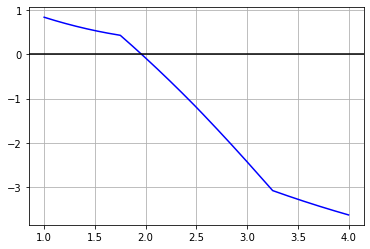

In [47]:
x_data = np.linspace(1, 4, 1000)
#print(x_data)
color = ["black", "green", "blue", "yellow", "orange", "violet"]
df = lambda x: np.sin(2-x) - x*np.cos(2 - x)
fig, axs = plt.subplots()
#axs.plot(x_data, f(x_data), color="green")
#axs.plot(x_data, Lagrange_Polynom(x_data), color="violet")
axs.plot(x_data, np.array([Spline(arg) for arg in x_data]), color="blue")
#axs.plot(x_data, np.array([f(arg) - Spline(arg) for arg in x_data]), color="red")
#axs.plot(x_data, f(x_data) - Lagrange_Polynom(x_data), color="orange")
print(max(np.array([f(arg) - Spline(arg) for arg in x_data])))
i = 0
#for p in spline:
    #k = lambda arg: p.a + p.b*(arg - p.x0) + p.c*(arg - p.x0)*(arg - p.x1)
    #axs.plot(x_data, k(x_data), color=color[i % len(color)])
    #i += 1
#plt.scatter(x, y, color='orange', s=30, marker='o')
ax = plt.gca()
# plot X - axis    
ax.axhline(y=0, color='k')
#axs.set(ylim=(-1, 1))
#axs.legend()
axs.grid(True)
#plt.savefig("plot_4.2.png", dpi=500)

In [24]:
print(spline[2])

Polynom(a=0.5453244946602539, b=-1.635973483980761, c=-0.30411597298865795, x0=1.6666666666666665, x1=2.0)


In [11]:
y[2] + (-1.635973483980761)*(x[3] - x[2])

0.8351172226516269

In [12]:
y[3]

0.846588332454848

In [13]:
Spline(x[3])

0.846588332454848

In [14]:
spline[2]

Polynom(a=0.8449527345793668, b=0.2720544466217071, c=-0.008611941962495668, x0=1.0120240480961924, x1=1.0180360721442885)

In [15]:
x[2]

1.0120240480961924

In [16]:
x[3]

1.0180360721442885